## Assignment - kNN Classification

We will be using the pima-indians-diabetes to create a classifier to diagnose patients. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Objective:

Can you build a kNN model to accurately predict whether or not the patients in the dataset have diabetes or not?


In [229]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
# Get the Data
df = pd.read_csv("Kritsana NETPUGDEE - diabetes.csv")

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Problem: 

You need to design a kNN classifier to predict whether or not a patient has diabetes. 

### <font color='red'>Question 1:</font> 

Generate descriptive statistics such as count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

In [231]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
#### DO NOT RUN THIS CELL!!!

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### <font color='red'>Question 2:</font> 

Generate a concise summary of a DataFrame to show information about the index dtype and columns, non-null values and memory usage.

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#### DO NOT RUN THIS CELL!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### <font color='red'>Question 3:</font> 

Print out the dimension of DataFram i.e. no. of rows and columns

In [233]:
df.shape

(768, 9)

In [5]:
#### DO NOT RUN THIS CELL!!!

(768, 9)

### <font color='red'>Question 4:</font> 

Print out number 0 (non-diabetics) and 1 (diabetics) in the column 'Outcome' in the DataFrame.

In [234]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
#### DO NOT RUN THIS CELL!!!

0    500
1    268
Name: Outcome, dtype: int64

### <font color='red'>Question 5:</font> 

Check data types of dataset

In [235]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#### DO NOT RUN THIS CELL!!!

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### <font color='red'>Question 6:</font> 

Create ***df_new*** by droping out features in column "Pregnancies" and "Outcome". 

In [236]:
df_new = pd.DataFrame(df)
df_new = df.drop(labels=None, axis=1, index=None, columns=['Pregnancies','Outcome'], level=None, inplace=False, errors='raise')
df_new.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [8]:
#### DO NOT RUN THIS CELL!!!

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


### <font color='red'>Question 7:</font> 

Compute pairwise correlation of columns.

In [237]:
df_new.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [9]:
#### DO NOT RUN THIS CELL!!!

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


### <font color='red'>Question 8:</font> 

Scaling the data using StandardScaler function.

In [238]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [251]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(df_new).transform(df_new.astype(float))
X
df_feat = pd.DataFrame(X, columns=df_new.columns[:])
df_feat.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [10]:
#### DO NOT RUN THIS CELL!!!

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### <font color='red'>Question 9:</font> 

Split data into random train and test subsets with the ratio 70:30 and random_state=1. Also, makes sure that a proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example: if variable a binary categorical variable y (0 or 1) consists of 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [252]:
from sklearn.model_selection import train_test_split
train_X = np.asanyarray(X)
train_y = df['Outcome'].values
#train_y = np.asanyarray(df[['TARGET CLASS']])
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.3, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 7) (537,)
Test set: (231, 7) (231,)


### <font color='red'>Question 10:</font> 

Return the mean accuracy from k = 1 to 14 on the given test data and labels.

In [253]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
K = 15
Train = np.zeros((K-1))
Test = np.zeros((K-1))
for n in range(1,K):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    Train[n-1] = metrics.accuracy_score(y_train, pred_train)
    Test[n-1] = metrics.accuracy_score(y_test, pred_test)
    print("Train set Accuracy: ",Train[n-1])
    print("Test set Accuracy: ", Test[n-1])
print(Train)
print(Test)

Train set Accuracy:  1.0
Test set Accuracy:  0.7056277056277056
Train set Accuracy:  0.8230912476722533
Test set Accuracy:  0.7056277056277056
Train set Accuracy:  0.8342644320297952
Test set Accuracy:  0.7359307359307359
Train set Accuracy:  0.7932960893854749
Test set Accuracy:  0.7359307359307359
Train set Accuracy:  0.8100558659217877
Test set Accuracy:  0.7619047619047619
Train set Accuracy:  0.7932960893854749
Test set Accuracy:  0.7662337662337663
Train set Accuracy:  0.7951582867783985
Test set Accuracy:  0.7748917748917749
Train set Accuracy:  0.7951582867783985
Test set Accuracy:  0.7792207792207793
Train set Accuracy:  0.7970204841713222
Test set Accuracy:  0.8008658008658008
Train set Accuracy:  0.7728119180633147
Test set Accuracy:  0.7965367965367965
Train set Accuracy:  0.7839851024208566
Test set Accuracy:  0.7922077922077922
Train set Accuracy:  0.7690875232774674
Test set Accuracy:  0.7835497835497836
Train set Accuracy:  0.7858472998137802
Test set Accuracy:  0.78354

#### <font color='red'>Question 11:</font> 

Plot accuracy results of kNN with k = 1 to 14 on both training and testing data.

Text(0.5, 1.0, 'Accuracy Rate vs. K Value')

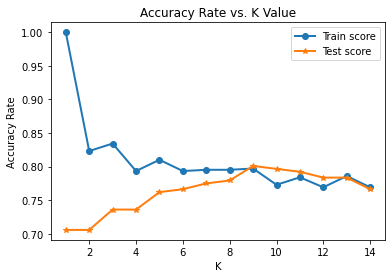

In [254]:
plt.plot(range(1,K),Train, marker='o',label="Train score",linewidth=2)
plt.plot(range(1,K),Test, marker='*', label="Test score",linewidth=2)
plt.ylabel('Accuracy Rate')
plt.xlabel('K')
plt.legend()
plt.title("Accuracy Rate vs. K Value")

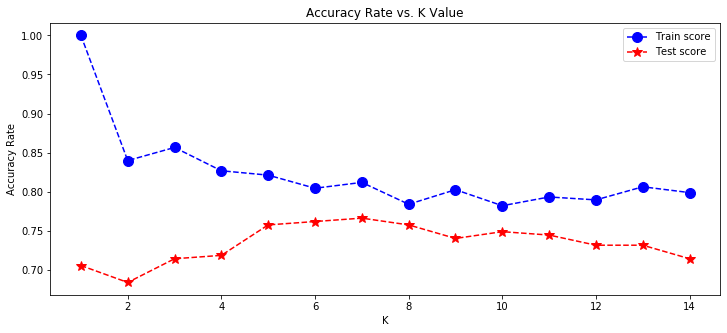

In [13]:
#### DO NOT RUN THIS CELL!!!

### <font color='red'>Question 12:</font> 

Choose the best value of k from previous step and report the classification rate.

In [255]:
testmax = Test.max()
print(f"KNN accuracy = {testmax:.4f}")

KNN accuracy = 0.8009


In [14]:
#### DO NOT RUN THIS CELL!!!

kNN accuracy = 0.7662


### <font color='red'>Question 13:</font> 

Show the confusion matrix and classification_report of the best k value.

In [256]:
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred_test = knn.predict(X_test)
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[133  13]
 [ 33  52]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.80      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



In [15]:
#### DO NOT RUN THIS CELL!!!

[[129  21]
 [ 33  48]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       150
           1       0.70      0.59      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.77      0.76       231

